In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


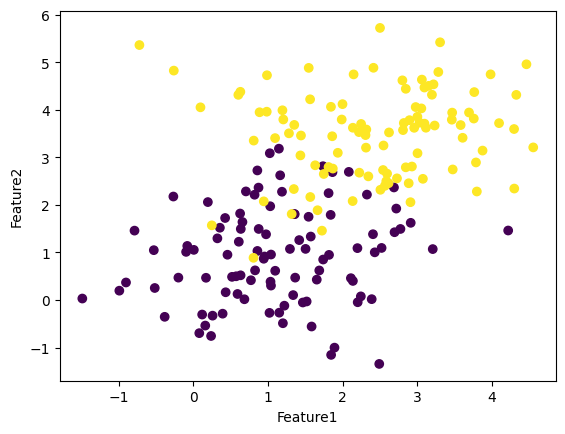

,Feature_1,Feature_2
0,2.687848,2.366961
1,-0.201379,0.470430
2,0.608496,1.225400
3,-0.082282,1.137218
4,2.083069,2.694482
...,...,...
194,0.629144,4.378584
195,-0.723824,5.361801
196,1.346107,2.333476
197,3.608219,3.411546


In [3]:
df_2d = pd.read_csv('data\\data_2d.csv')
df_2d.columns = ['Clusters', 'Feature_1', 'Feature_2']
plt.scatter(df_2d['Feature_1'], df_2d['Feature_2'], c=df_2d['Clusters'], cmap='viridis')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()
X = df_2d.drop('Clusters', axis=1)
X


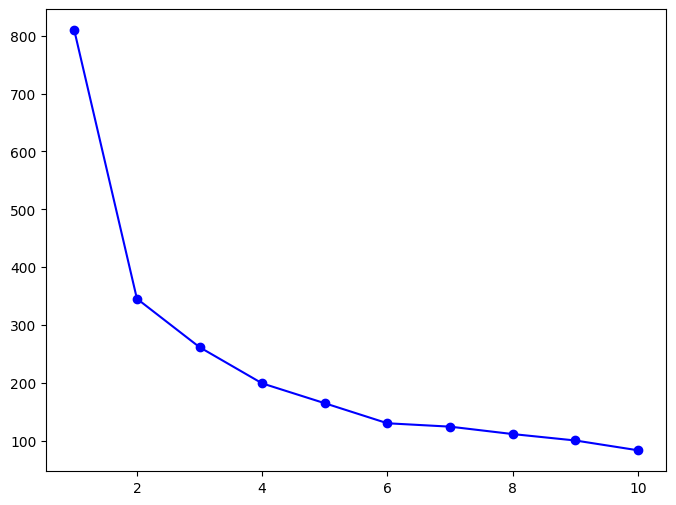

In [4]:
range_clasters = range(1, 11)
inertia_values = []

for n_clasters in range_clasters:
    kmeans_2d = KMeans(n_clusters=n_clasters, init='k-means++' )
    kmeans_2d.fit(X)
    inertia_values.append(kmeans_2d.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range_clasters, inertia_values, 'bo-')
plt.show()

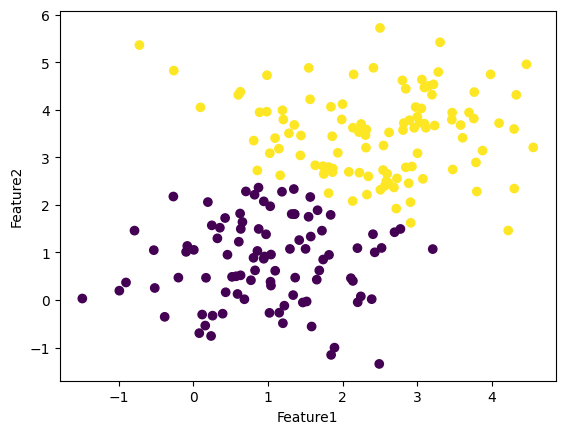

In [5]:
kmeans_2d = KMeans(n_clusters=2, init='k-means++')
kmeans_2d.fit(X)

clusters = kmeans_2d.predict(X)
X['Clusters'] = clusters
plt.scatter(X['Feature_1'], X['Feature_2'], c=X['Clusters'], cmap='viridis')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

In [6]:
df_mnist = pd.read_csv('data\\mnist.csv')
df_mnist


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y = df_mnist['7']
X_mnist = df_mnist.drop('7', axis=1)


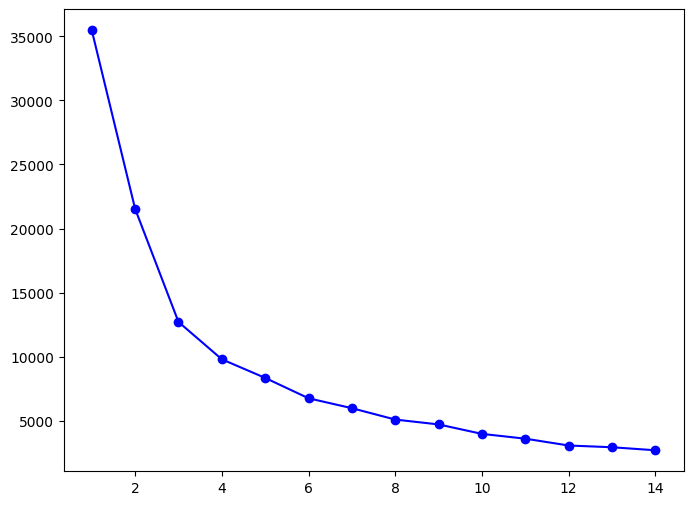

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



#Зменшую розмірність
X_trans = StandardScaler().fit_transform(X_mnist)
X_trans = PCA(n_components = 2).fit_transform(X_trans)
X_trans = pd.DataFrame(X_trans, columns=['Feature_1', 'Feature_2'])


range_clasters = range(1, 15)
inertia_values = []

for n_clasters in range_clasters:
    kmeans_mnist = KMeans(n_clusters=n_clasters, init='k-means++' )
    kmeans_mnist.fit(X_trans)
    inertia_values.append(kmeans_mnist.inertia_)
    

#Графік з зменщенням розмірності
plt.figure(figsize=(8, 6))
plt.plot(range_clasters, inertia_values, '-bo')
plt.show()



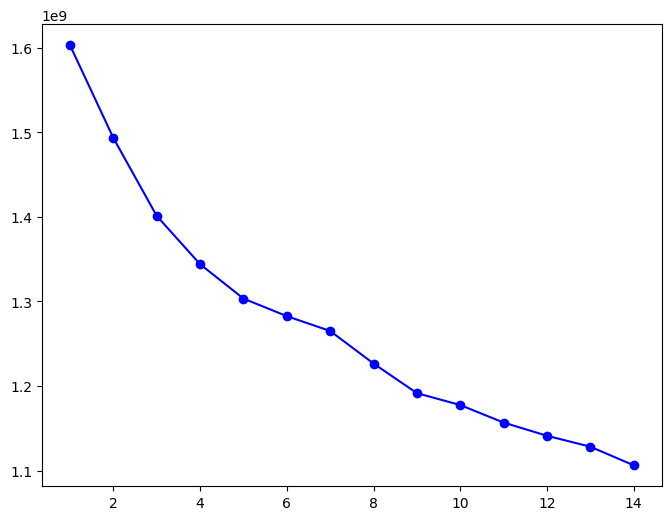

In [11]:
#Графік без зменщення розмірності
range_clasters = range(1, 15)
inertia_values = []

for n_clasters in range_clasters:
    kmeans_mnist = KMeans(n_clusters=n_clasters, init='k-means++' )
    kmeans_mnist.fit(X_mnist)
    inertia_values.append(kmeans_mnist.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range_clasters, inertia_values, '-bo')
plt.show()


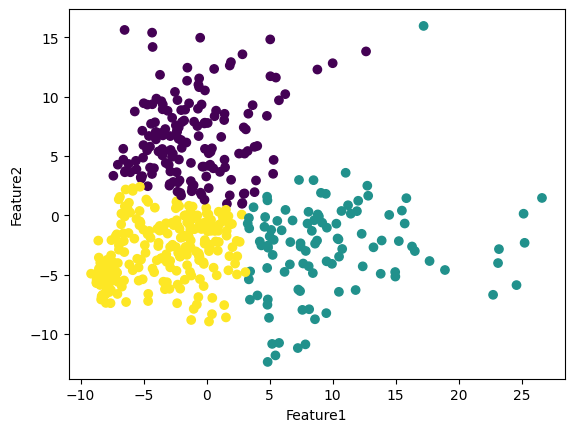

In [10]:
#З першого графіка методом ліктя знайшов лише 3 кластери



kmeans_mnist = KMeans(n_clusters=3, init='k-means++')
kmeans_mnist.fit(X_trans)

clusters = kmeans_mnist.predict(X_trans)
X_trans['Clusters'] = clusters
plt.scatter(X_trans['Feature_1'], X_trans['Feature_2'], c=X_trans['Clusters'], cmap='viridis')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()